In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Data%20Analyst%20Jobs/DataAnalyst.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [4]:
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
data['Job Title'] = data['Job Title'].replace({'Sr. Data Analyst': 'Senior Data Analyst', 
                                               'Sr Data Analyst': 'Senior Data Analyst',
                                               'Sr Analyst, Data': 'Senior Data Analyst',
                                               'Data Analyst Junior': 'Junior Data Analyst'})
data['Job Title'].nunique()

1268

In [6]:
data["Job Title"].value_counts()[:30]

Data Analyst                                                                        405
Senior Data Analyst                                                                 121
Junior Data Analyst                                                                  47
Business Data Analyst                                                                28
Data Analyst II                                                                      17
Data Quality Analyst                                                                 17
Data Governance Analyst                                                              16
Lead Data Analyst                                                                    15
Data Reporting Analyst                                                               13
Financial Data Analyst                                                               12
Data Analyst III                                                                     11
Data Analyst I                  

In [7]:
test = data['Salary Estimate'].str.split('-', expand=True)
data['MinSalary'] = pd.to_numeric(test[0].str.extract('(\d+)', expand=False))
data['MaxSalary'] = pd.to_numeric(test[1].str.extract('(\d+)', expand=False))

data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,MinSalary,MaxSalary
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37.0,66
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37.0,66
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66


In [8]:
data['Job Title'].value_counts()[:30]

Data Analyst                                                                        405
Senior Data Analyst                                                                 121
Junior Data Analyst                                                                  47
Business Data Analyst                                                                28
Data Analyst II                                                                      17
Data Quality Analyst                                                                 17
Data Governance Analyst                                                              16
Lead Data Analyst                                                                    15
Data Reporting Analyst                                                               13
Financial Data Analyst                                                               12
Data Analyst III                                                                     11
Data Analyst I                  

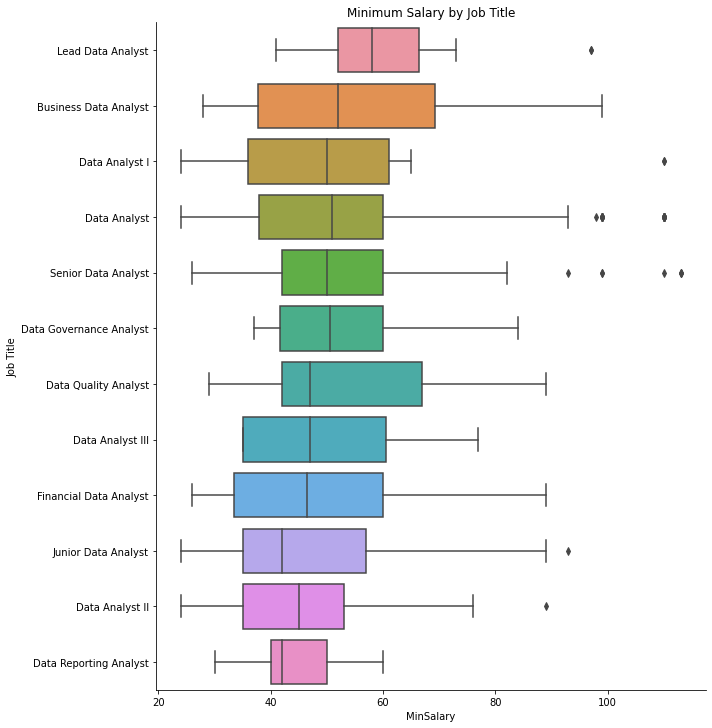

In [9]:
def plot_salary(y, salary, amt=30, title=''):
    l = list(data[y].value_counts().iloc[:amt].index)
    temp = data[data[y].isin(l)]
    
    salary_order = temp.groupby(y)[salary].mean().sort_values(ascending=False).index.values
    
    chart = sns.catplot(data=temp, y=y, x=salary, kind='box', 
                    order=salary_order, 
                    height=10, aspect=1)
    
    plt.title(title)

def least_freq(group, target, min_counts=3, max_counts=11):
    counts = Counter(data[group])
    sal = data[data[group]\
                   .isin([x for x in counts if (counts[x] > min_counts & counts[x] < max_counts)])]\
    .groupby(group)[target].mean().reset_index()

    return sal.sort_values(by=(target),ascending=False).head(10)
plot_salary('Job Title', 'MinSalary', amt=12, title='Minimum Salary by Job Title')

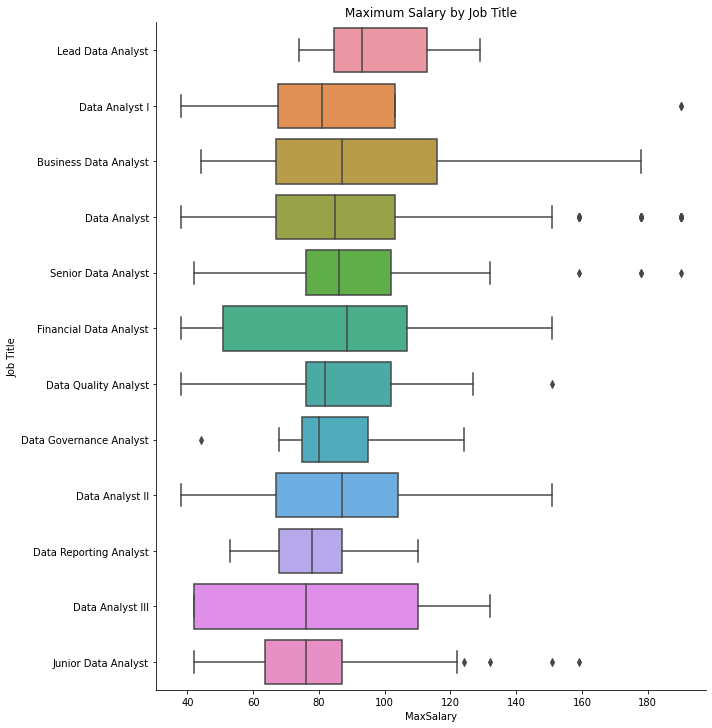

In [10]:
plot_salary('Job Title', 'MaxSalary', amt=12, title='Maximum Salary by Job Title')

In [11]:
least_freq('Job Title', 'MinSalary')

,Job Title,MinSalary
25,NY Healthcare Data/Reporting Analyst,76.800000
34,Senior Healthcare Data Analyst,75.600000
31,Senior Contract Data Analyst,75.500000
27,Product Data Analyst,74.000000
26,Operations Data Analyst,72.250000
29,Research Data Analyst,70.333333
23,Marketing Data Analyst,65.777778
24,Master Data Analyst,64.500000
9,"Data Analyst, Data & Analytics (Advanced Analy...",64.250000
16,Data Security Analyst,63.666667


In [12]:
least_freq('Job Title', 'MaxSalary')

,Job Title,MaxSalary
27,Product Data Analyst,125.800000
26,Operations Data Analyst,124.750000
29,Research Data Analyst,119.833333
34,Senior Healthcare Data Analyst,110.200000
23,Marketing Data Analyst,109.666667
24,Master Data Analyst,109.500000
9,"Data Analyst, Data & Analytics (Advanced Analy...",107.750000
25,NY Healthcare Data/Reporting Analyst,102.400000
10,Data Base Programmer/Analyst,100.000000
22,Lead Data Analyst,99.266667


In [13]:
data['Location'].nunique()

253

In [14]:
data["Location"].value_counts()[:30]

New York, NY          310
Chicago, IL           130
San Francisco, CA     119
Austin, TX             81
Los Angeles, CA        80
Charlotte, NC          78
Houston, TX            72
Dallas, TX             66
San Diego, CA          62
Philadelphia, PA       56
Denver, CO             47
San Antonio, TX        45
San Jose, CA           38
Phoenix, AZ            35
Jersey City, NJ        33
Tempe, AZ              31
Seattle, WA            30
Irving, TX             29
Columbus, OH           29
Plano, TX              28
Santa Clara, CA        22
Salt Lake City, UT     22
El Segundo, CA         19
Jacksonville, FL       19
San Mateo, CA          18
Norfolk, VA            18
Indianapolis, IN       17
Burbank, CA            17
Sunnyvale, CA          16
Fort Worth, TX         16
Name: Location, dtype: int64

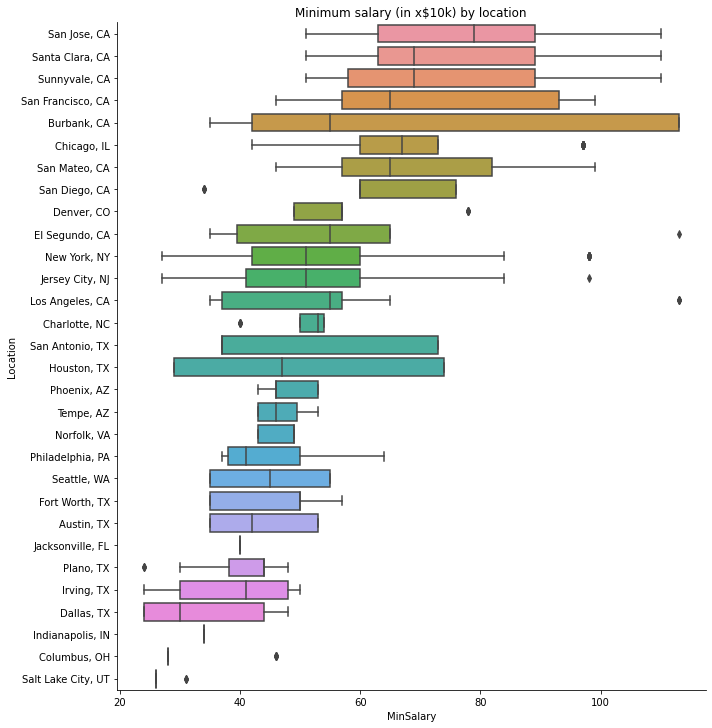

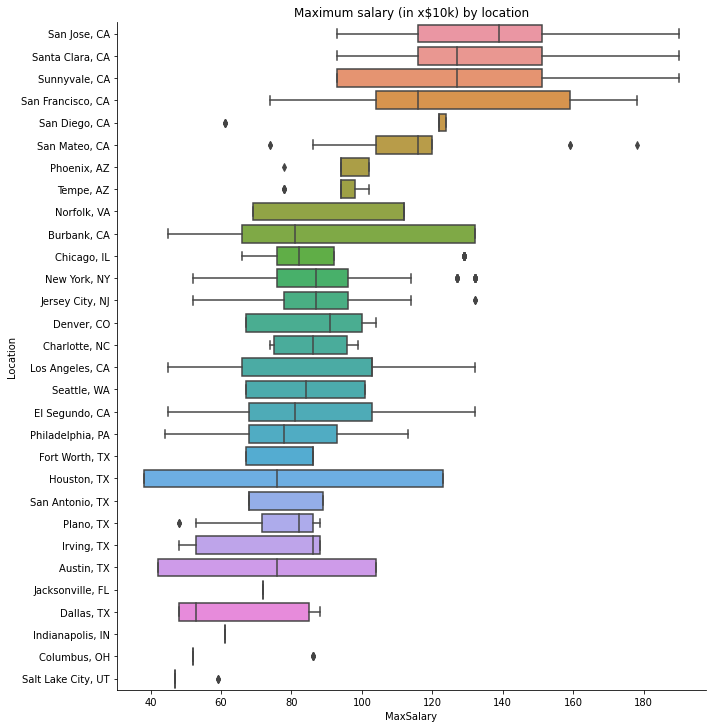

In [15]:
plot_salary('Location', 'MinSalary', title='Minimum salary (in x$10k) by location')

plot_salary('Location', 'MaxSalary', title='Maximum salary (in x$10k) by location')

In [16]:
least_freq('Location', 'MinSalary')

,Location,MinSalary
83,"Woodland Hills, CA",81.333333
71,"San Jose, CA",79.421053
24,"Florham Park, NJ",78.600000
18,"Cupertino, CA",77.769231
73,"Santa Clara, CA",76.181818
9,"Burlingame, CA",76.000000
78,"Sunnyvale, CA",75.000000
48,"Menlo Park, CA",74.272727
70,"San Francisco, CA",72.521008
45,"Long Beach, CA",71.000000


In [17]:
least_freq('Location', 'MaxSalary')

,Location,MaxSalary
71,"San Jose, CA",138.289474
18,"Cupertino, CA",134.000000
73,"Santa Clara, CA",133.090909
78,"Sunnyvale, CA",130.562500
48,"Menlo Park, CA",129.454545
70,"San Francisco, CA",126.025210
27,"Fremont, CA",123.800000
65,"Redwood City, CA",123.500000
56,"Palo Alto, CA",120.000000
69,"San Diego, CA",118.048387


,Headquarters,MinSalary
41,"Glendale, CA",77.166667
37,"Foster City, CA",73.200000
114,"Troy, MI",73.083333
75,"Palo Alto, CA",72.571429
56,"Long Beach, CA",71.222222
85,"Pleasanton, CA",71.166667
96,"San Francisco, CA",70.788732
109,"Sunnyvale, CA",70.000000
74,"Oakland, CA",68.900000
25,"Cupertino, CA",68.800000


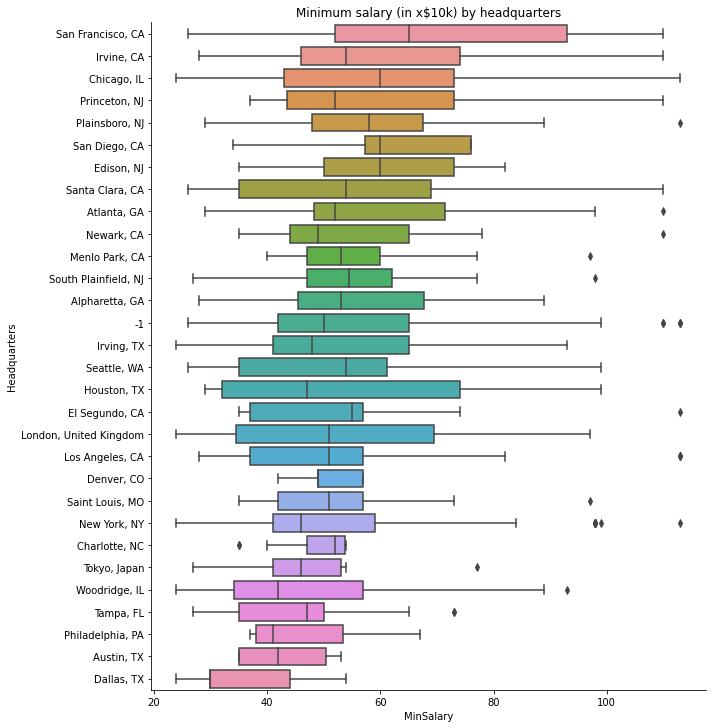

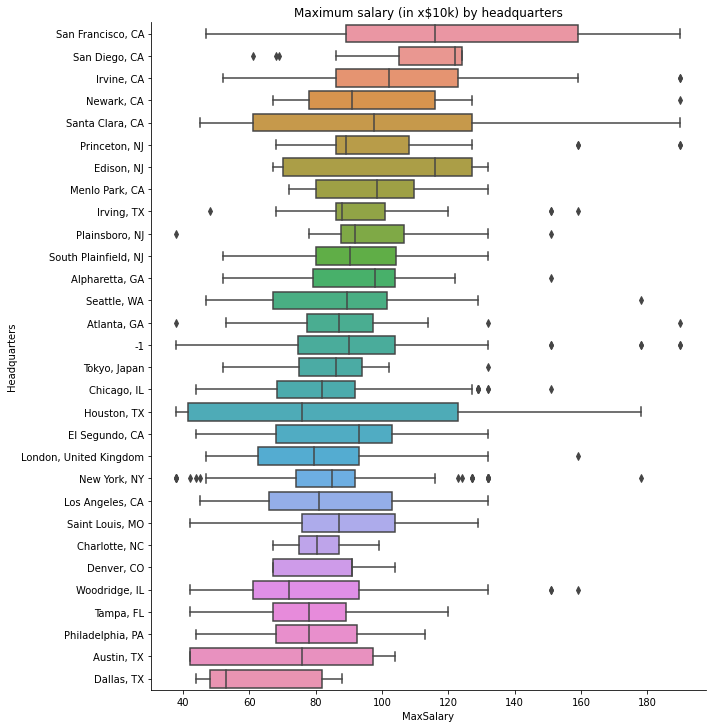

In [18]:
plot_salary('Headquarters', 'MinSalary', title='Minimum salary (in x$10k) by headquarters')

plot_salary('Headquarters', 'MaxSalary', title='Maximum salary (in x$10k) by headquarters')

least_freq('Headquarters', 'MinSalary')

In [19]:
least_freq('Headquarters', 'MaxSalary')

,Headquarters,MaxSalary
75,"Palo Alto, CA",127.857143
37,"Foster City, CA",125.000000
114,"Troy, MI",123.500000
109,"Sunnyvale, CA",123.428571
96,"San Francisco, CA",121.971831
81,"Piscataway, NJ",120.250000
25,"Cupertino, CA",120.200000
85,"Pleasanton, CA",118.833333
43,"Guaynabo, PR",113.500000
53,"La Jolla, CA",112.833333


In [20]:
split = data['Location'].str.split(',', expand=True)
data['City'] = split[0]
data['Country_State'] = split[1].str.strip()

data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,MinSalary,MaxSalary,City,Country_State
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66,New York,NY
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66,New York,NY
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37.0,66,New York,NY
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37.0,66,New York,NY
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66,New York,NY


In [21]:
split = data['Headquarters'].str.split(',', expand=True)
data['CityHQ'] = split[0]
data['Country_State_HQ'] = split[1].str.strip()

data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,Easy Apply,MinSalary,MaxSalary,City,Country_State,CityHQ,Country_State_HQ
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,...,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66,New York,NY,New York,NY
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,...,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66,New York,NY,New York,NY
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,...,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37.0,66,New York,NY,New York,NY
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,...,Information Technology,$50 to $100 million (USD),-1,-1,37.0,66,New York,NY,McLean,VA
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,...,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66,New York,NY,New York,NY


In [22]:
data['Country_State'] = data['Country_State'].replace({'Arapahoe': 'CO'})
data['Country_State'].nunique()

19

In [23]:
data["Country_State"].value_counts()

CA    626
TX    394
NY    345
IL    164
PA    114
AZ     97
CO     96
NC     90
NJ     86
WA     54
VA     48
OH     35
UT     33
FL     27
IN     23
DE     11
GA      4
SC      3
KS      3
Name: Country_State, dtype: int64

In [24]:
data["Country_State"].nunique()

19

In [25]:
data["Country_State_HQ"].value_counts()[0:30]

CA                465
NY                251
TX                180
IL                164
NJ                164
VA                102
PA                 85
FL                 58
MI                 51
GA                 48
MD                 41
NC                 40
WA                 33
OH                 32
AZ                 30
CO                 29
United Kingdom     29
India              27
MA                 24
MO                 20
TN                 16
Japan              14
Canada             13
France             12
IN                 11
UT                 11
DC                  9
CT                  9
Singapore           7
Switzerland         7
Name: Country_State_HQ, dtype: int64

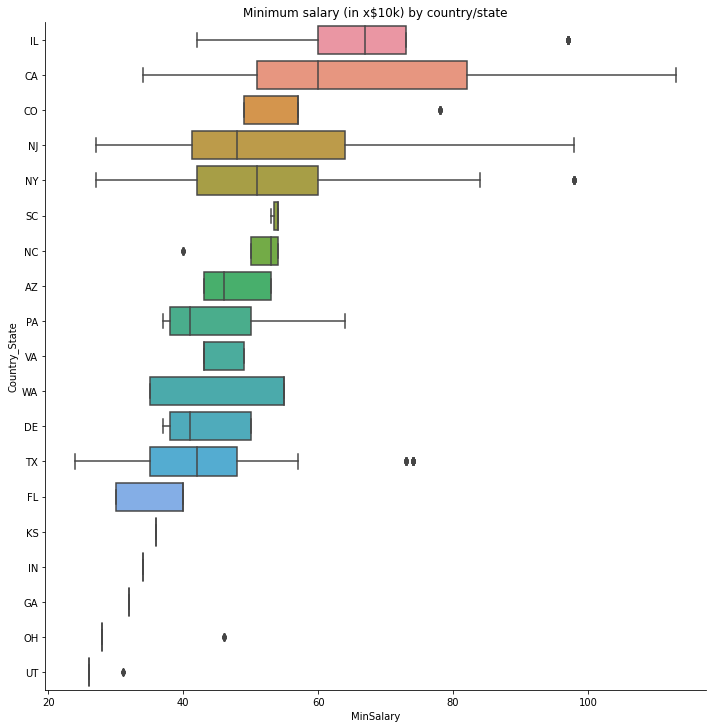

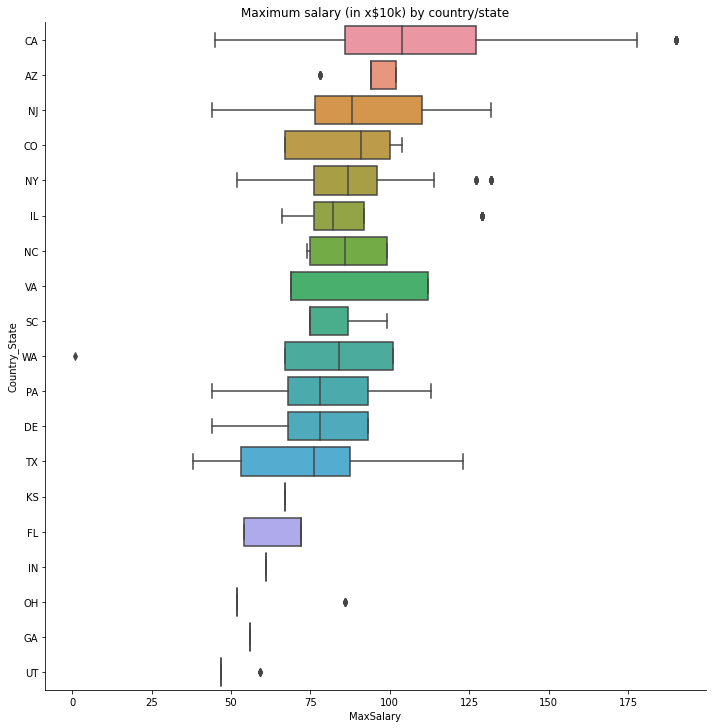

In [26]:
plot_salary('Country_State', 'MinSalary', title='Minimum salary (in x$10k) by country/state')

plot_salary('Country_State', 'MaxSalary', title='Maximum salary (in x$10k) by country/state')

,Country_State_HQ,MinSalary
61,Taiwan,113.00
7,Brazil,110.00
43,NV,78.00
0,061,74.00
66,VT,73.00
53,Portugal,69.50
21,IA,66.75
6,Austria,65.00
30,Luxembourg,64.00
29,LA,64.00


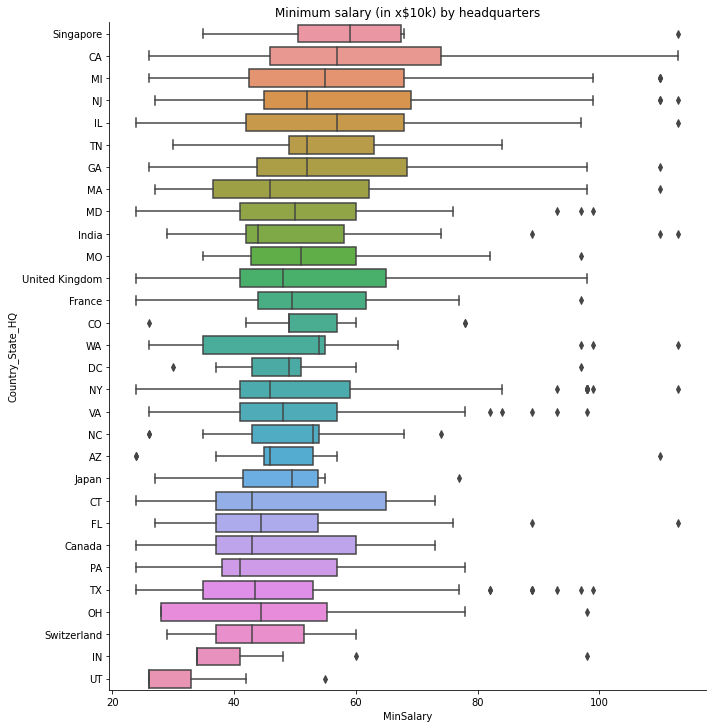

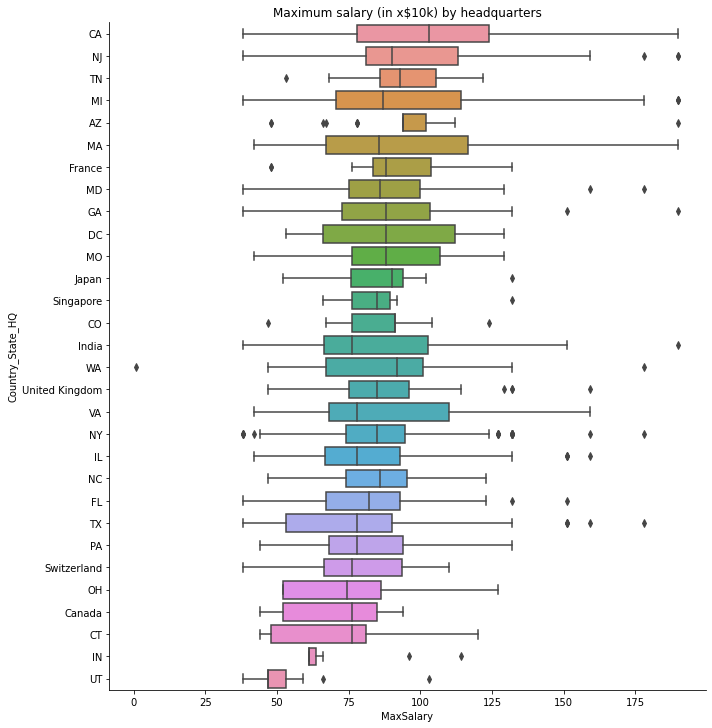

In [27]:
plot_salary('Country_State_HQ', 'MinSalary', title='Minimum salary (in x$10k) by headquarters')

plot_salary('Country_State_HQ', 'MaxSalary', title='Maximum salary (in x$10k) by headquarters')

least_freq('Country_State_HQ', 'MinSalary', min_counts=0, max_counts=7)

In [28]:
least_freq('Country_State_HQ', 'MaxSalary', min_counts=0, max_counts=7)

,Country_State_HQ,MaxSalary
7,Brazil,190.0
43,NV,146.0
61,Taiwan,132.0
0,061,123.0
6,Austria,120.0
52,PR,113.5
30,Luxembourg,113.0
28,KY,110.0
33,ME,105.0
46,Netherlands,104.0


In [29]:
data["Sector"].nunique()

25

In [30]:
data["Sector"].value_counts()

Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Mining & Metals                   

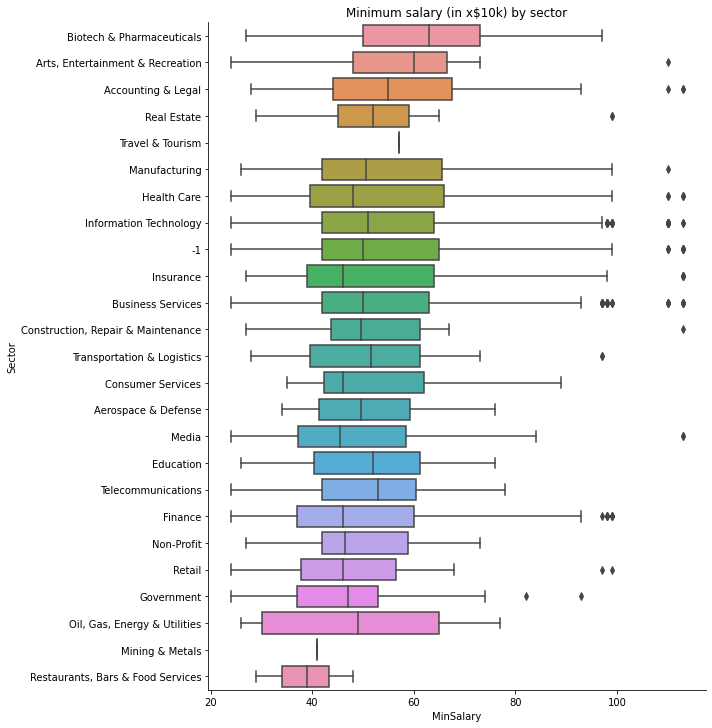

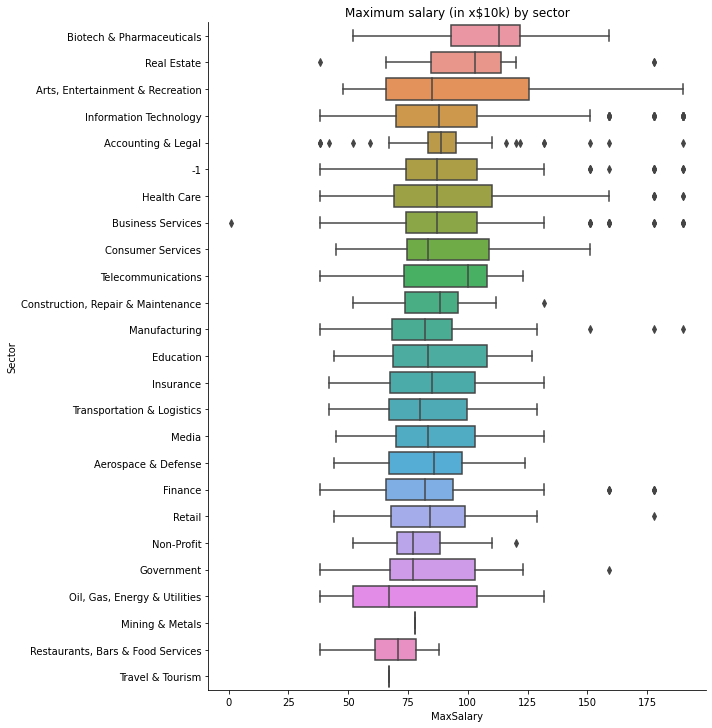

In [31]:
plot_salary('Sector', 'MinSalary', title='Minimum salary (in x$10k) by sector')

plot_salary('Sector', 'MaxSalary', title='Maximum salary (in x$10k) by sector')

In [32]:
def by_multiple(group, target, min_counts=11):
    counts = Counter(data[group[0]])
    sal = data[data[group[0]]\
               .isin([x for x in counts if counts[x] > min_counts])]\
               .groupby(group)[target[0]].mean().reset_index()

    return sal.sort_values(by=(target),ascending=False).head(10)
by_multiple(['Job Title', 'Sector'], ['MinSalary'])

,Job Title,Sector,MinSalary
86,Senior Data Analyst,"Arts, Entertainment & Recreation",110.000000
99,Senior Data Analyst,Real Estate,99.000000
4,Business Data Analyst,Health Care,99.000000
17,Data Analyst,Consumer Services,85.500000
37,Data Analyst II,Education,76.000000
30,Data Analyst,Retail,75.000000
14,Data Analyst,Biotech & Pharmaceuticals,73.333333
50,Data Quality Analyst,Government,73.000000
65,Financial Data Analyst,Information Technology,73.000000
79,Lead Data Analyst,Health Care,73.000000


In [33]:
by_multiple(['Sector', 'Job Title'], ['MinSalary'])

,Sector,Job Title,MinSalary
392,Business Services,Data Analyst *Temp-Hire*,113.0
14,-1,Business Analyst Asset Data Management,113.0
1345,Insurance,Data Analyst-HEDIS & Star,113.0
1133,Information Technology,Data Entry Clerk and Analyst - Financial,113.0
371,Business Services,Copyright Data Analyst,113.0
1339,Insurance,Data Analyst - Marketing Analytics,113.0
612,Business Services,Sr Digital Marketing Data Analyst (PAID SOCIAL),113.0
1338,Insurance,"Data Analyst - Health, Senior",113.0
1370,Insurance,Sr. Data Analyst (Pharmacy),113.0
221,-1,Systems and Data Analyst,113.0


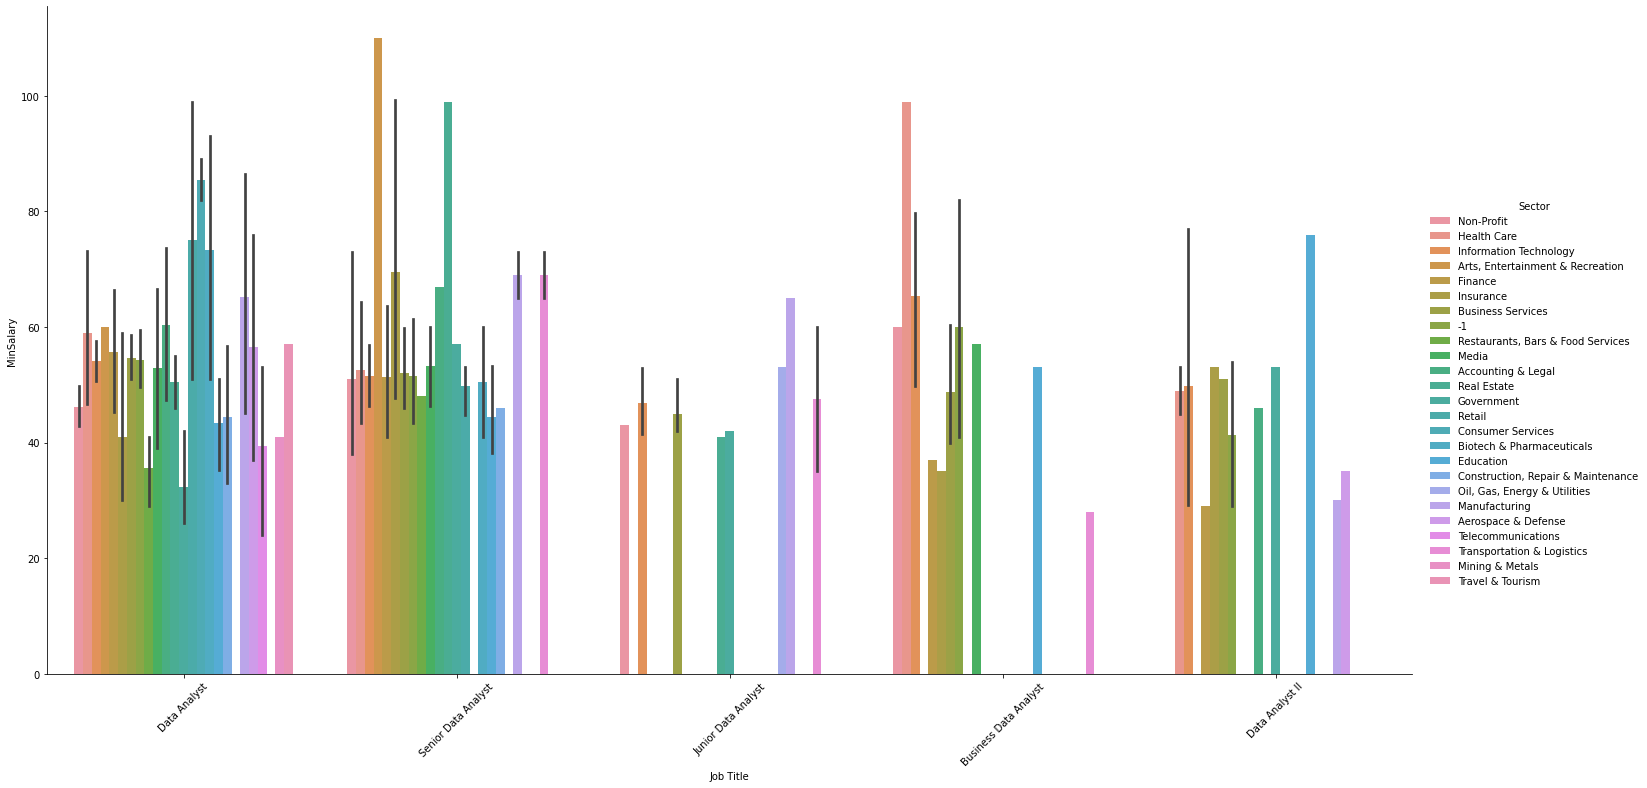

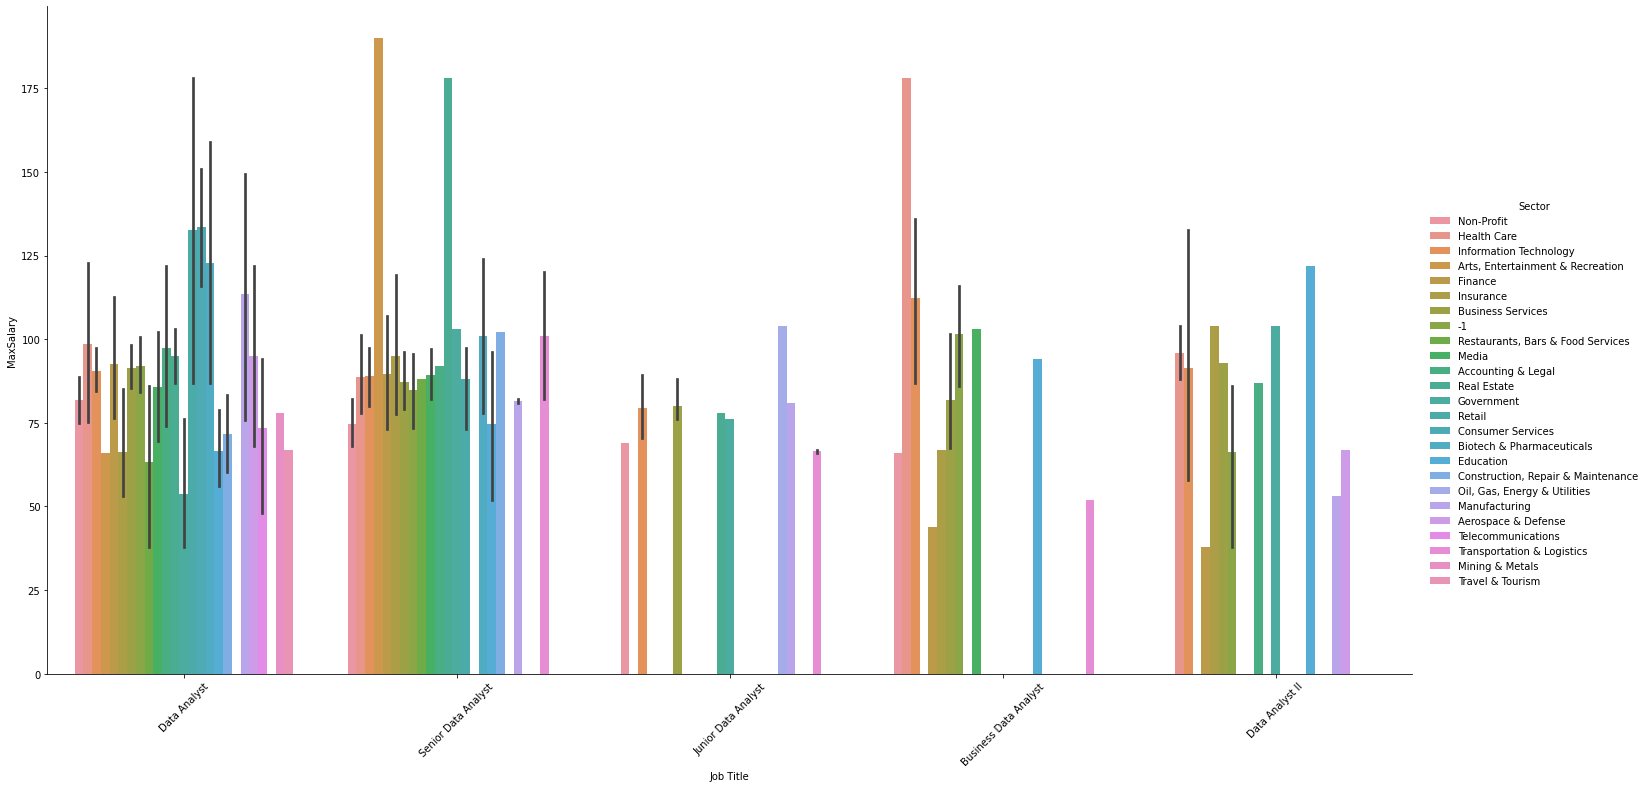

In [34]:
by_multiple(['Job Title', 'Sector'], ['MaxSalary'])
by_multiple(['Sector', 'Job Title'], ['MaxSalary'])
chart = sns.catplot(data=data, x='Job Title', y='MinSalary', kind='bar', hue='Sector',
                    order=data['Job Title'].value_counts().iloc[:5].index, 
                    height=10, aspect=2)

chart.set_xticklabels(rotation=45)
chart = sns.catplot(data=data, x='Job Title', y='MaxSalary', kind='bar', hue='Sector',
                    order=data['Job Title'].value_counts().iloc[:5].index, 
                    height=10, aspect=2)

chart.set_xticklabels(rotation=45)

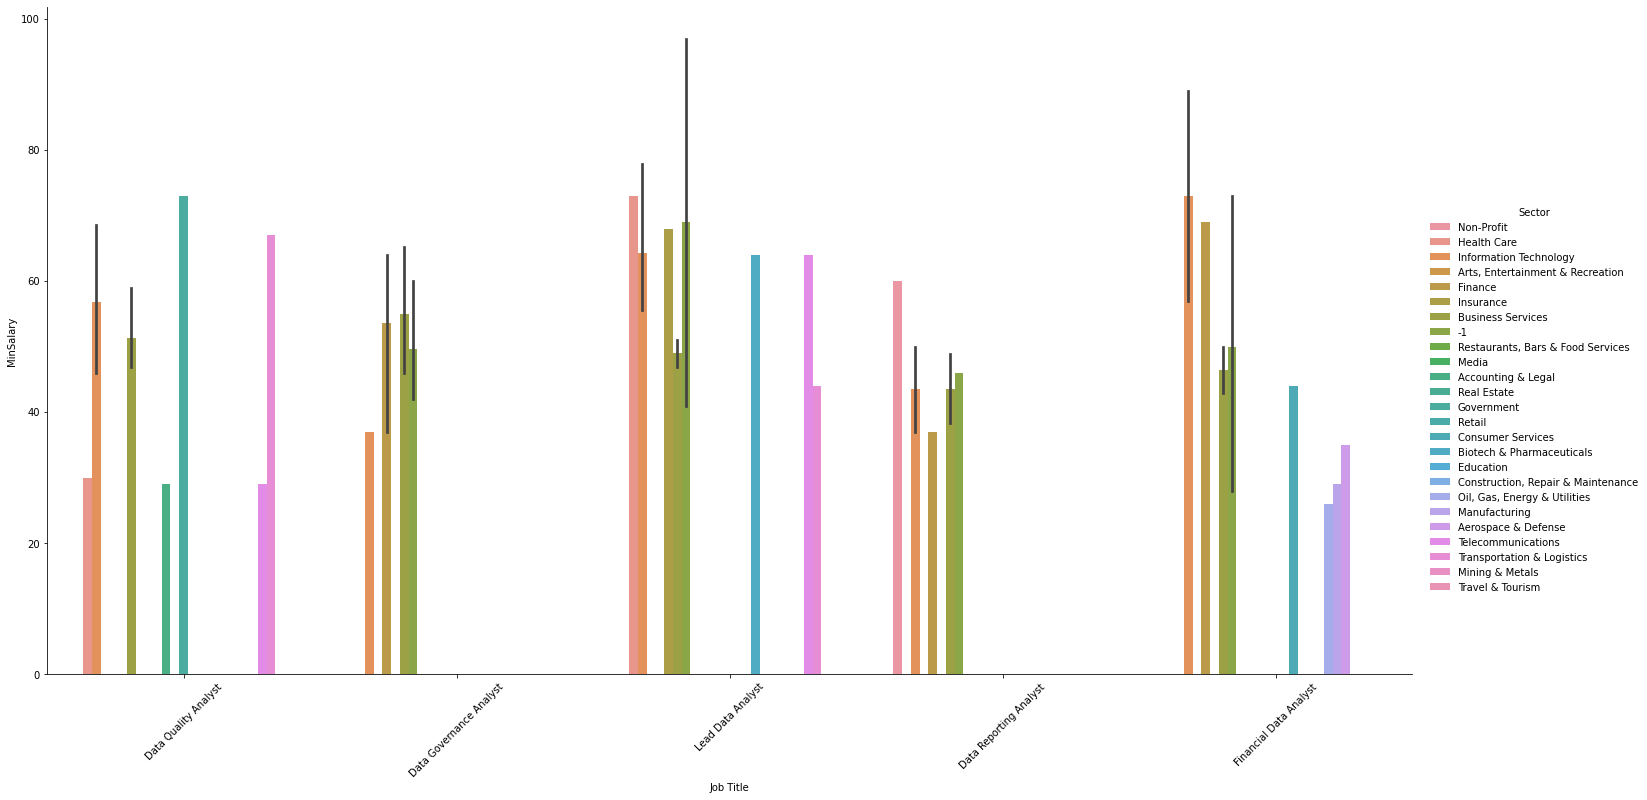

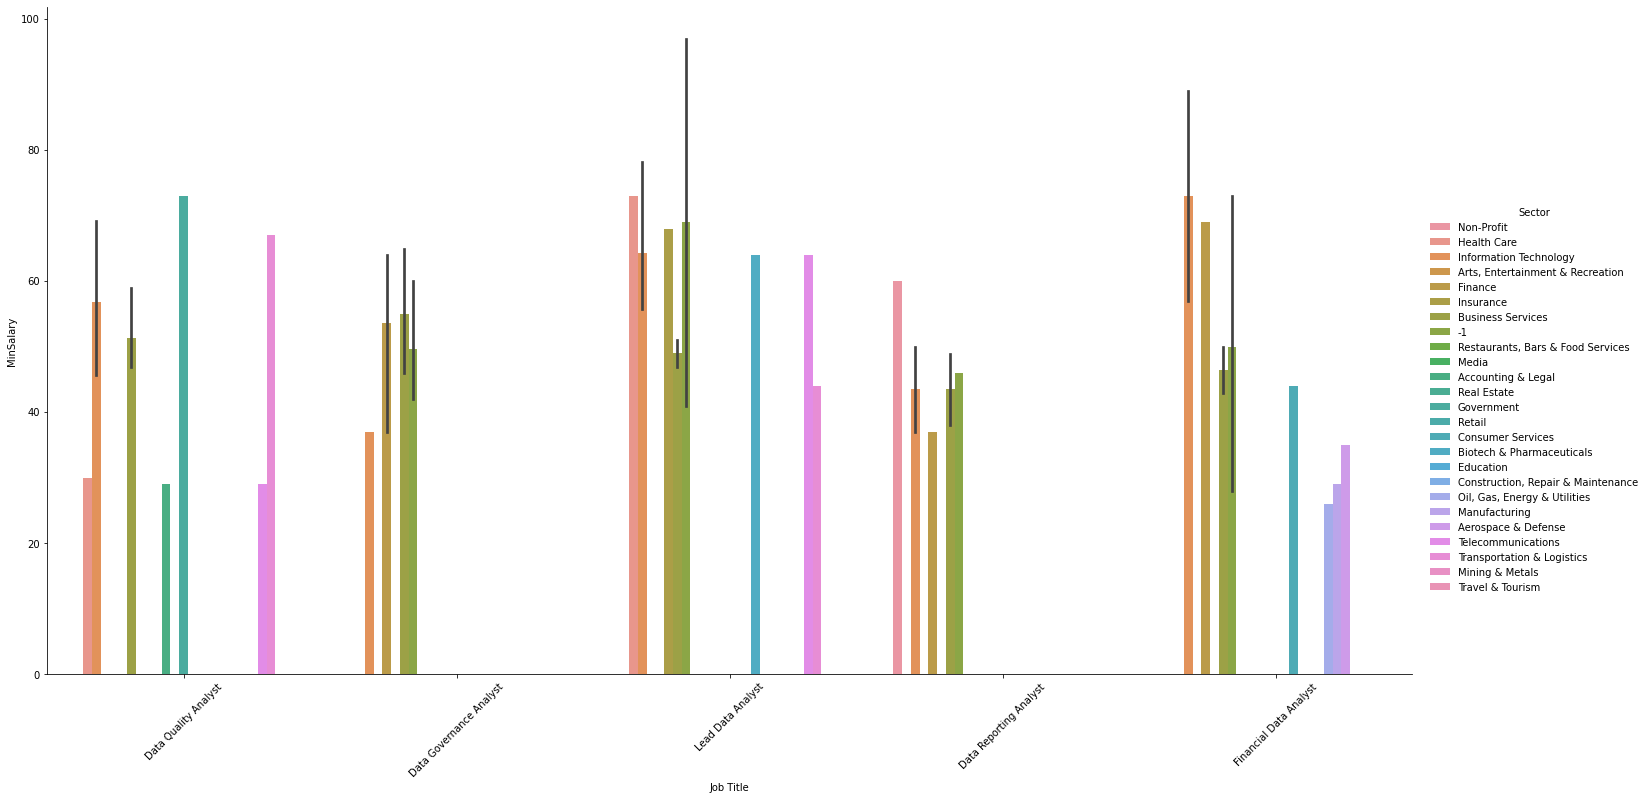

In [35]:
chart = sns.catplot(data=data, x='Job Title', y='MinSalary', kind='bar', hue='Sector',
                    order=data['Job Title'].value_counts().iloc[5:10].index, 
                    height=10, aspect=2)

chart.set_xticklabels(rotation=45)
chart = sns.catplot(data=data, x='Job Title', y='MinSalary', kind='bar', hue='Sector',
                    order=data['Job Title'].value_counts().iloc[5:10].index, 
                    height=10, aspect=2)

chart.set_xticklabels(rotation=45)

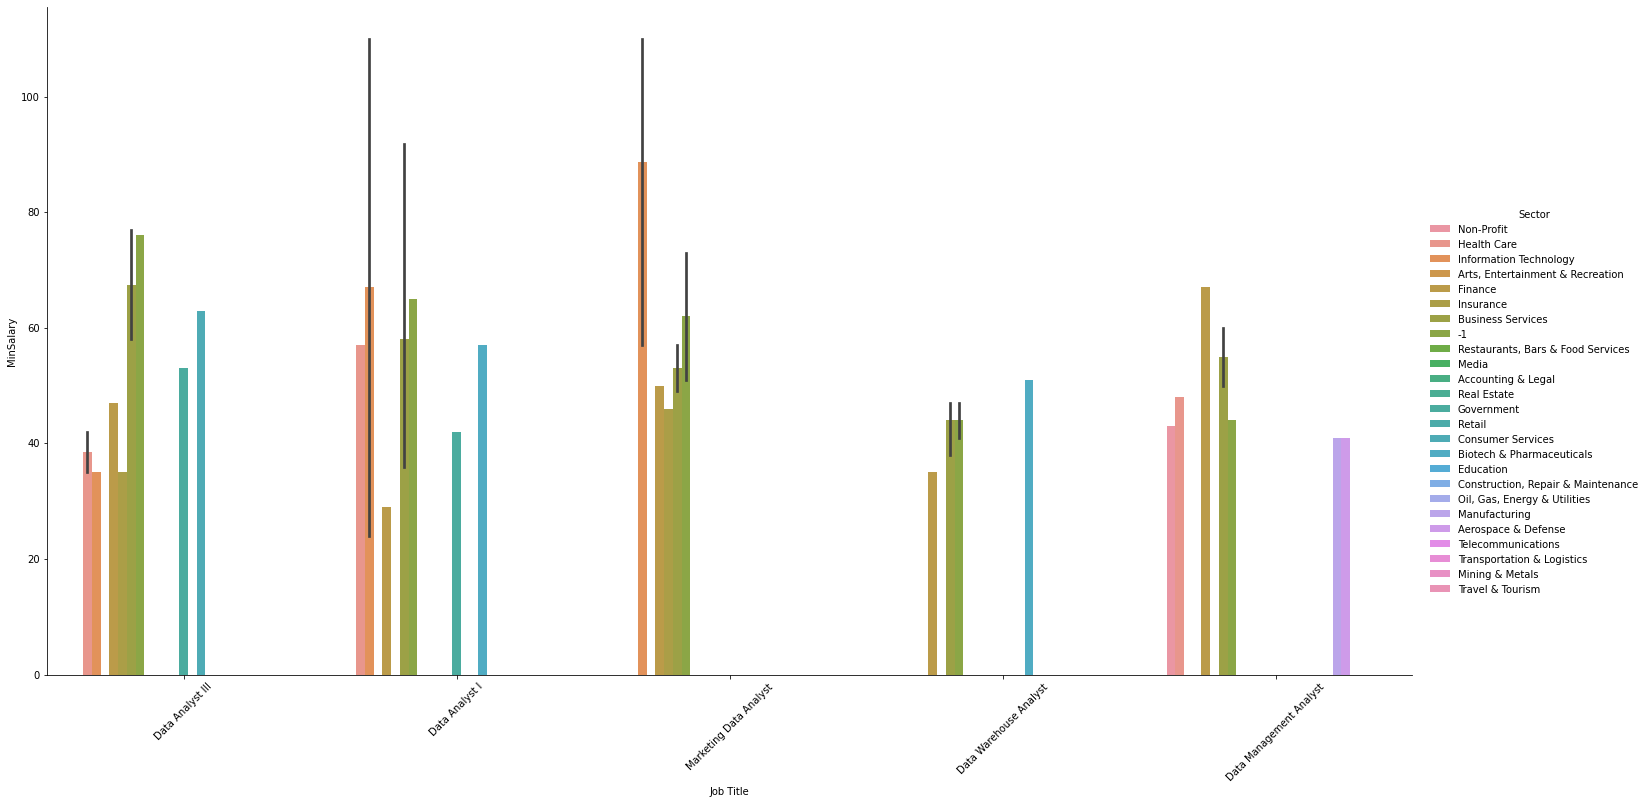

In [36]:
chart = sns.catplot(data=data, x='Job Title', y='MinSalary', kind='bar', hue='Sector',
                    order=data['Job Title'].value_counts().iloc[10:15].index, 
                    height=10, aspect=2)

chart.set_xticklabels(rotation=45)

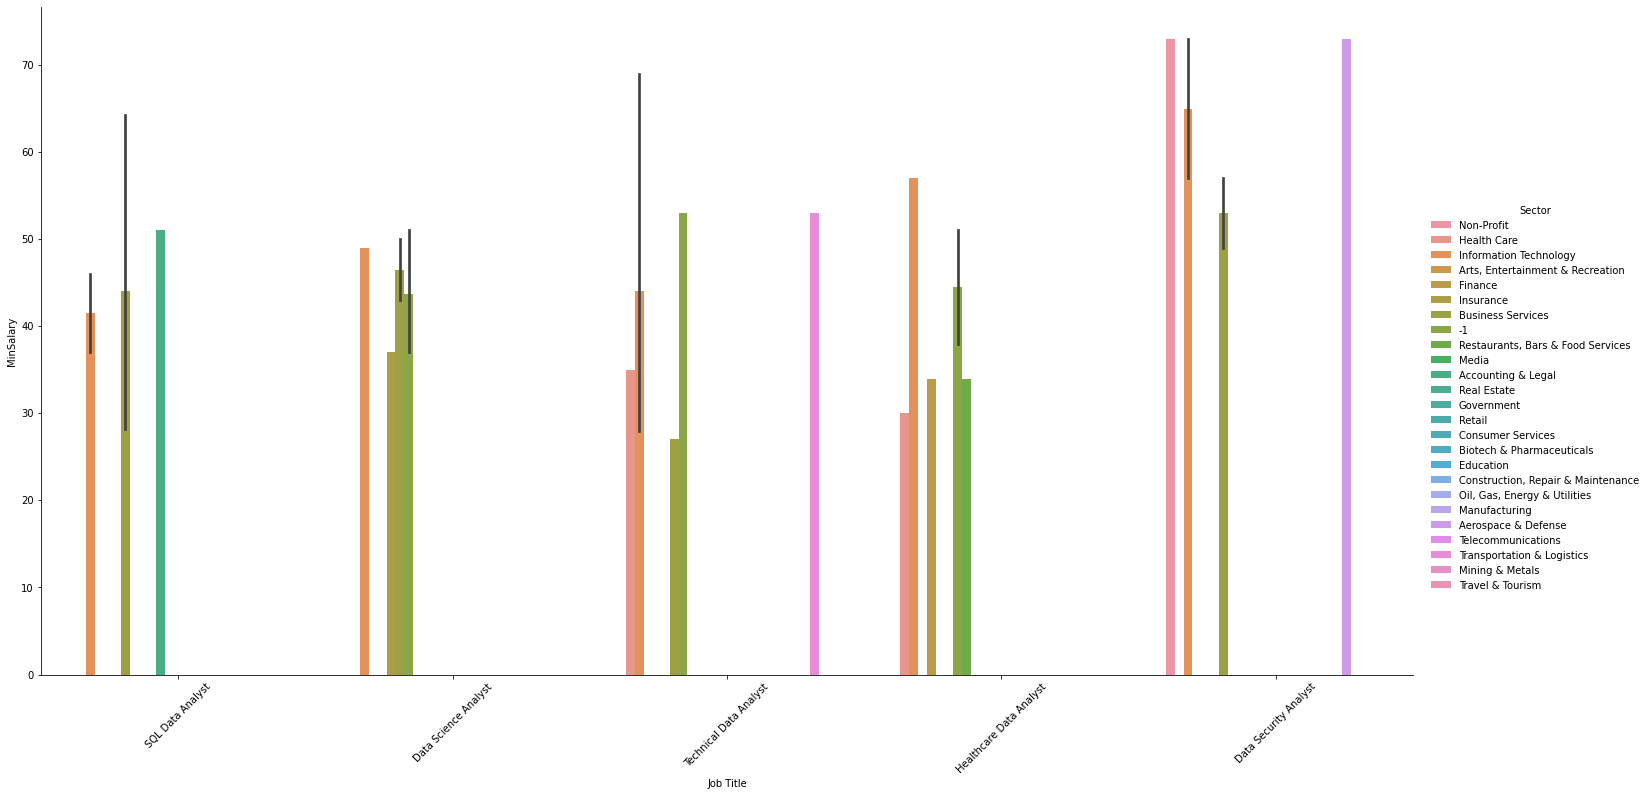

In [37]:
chart = sns.catplot(data=data, x='Job Title', y='MinSalary', kind='bar', hue='Sector',
                    order=data['Job Title'].value_counts().iloc[15:20].index, 
                    height=10, aspect=2)

chart.set_xticklabels(rotation=45)

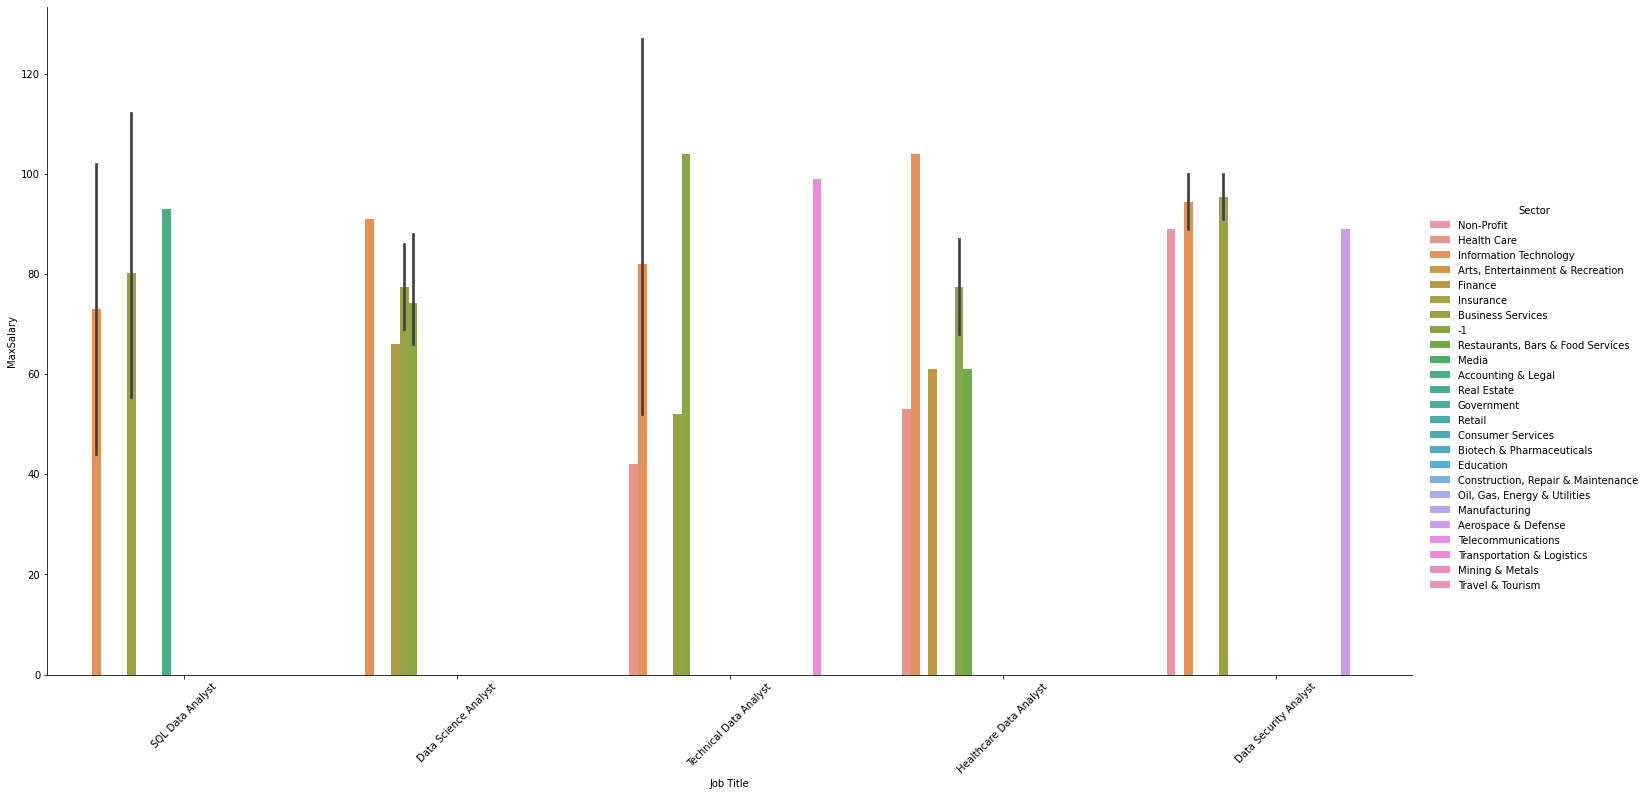

In [38]:
chart = sns.catplot(data=data, x='Job Title', y='MaxSalary', kind='bar', hue='Sector',
                    order=data['Job Title'].value_counts().iloc[15:20].index, 
                    height=10, aspect=2)

chart.set_xticklabels(rotation=45)

In [39]:
min_sal = data.groupby(['Company Name', 'Job Title', 'Rating', 'Sector', 'Country_State'])['MinSalary'].mean().reset_index()
min_sal.sort_values(by=(['Rating', 'MinSalary']),ascending=False).head(10)

,Company Name,Job Title,Rating,Sector,Country_State,MinSalary
1060,LaBine & Associates\n5.0,Sr Digital Marketing Data Analyst (PAID SOCIAL),5.0,Business Services,CA,113.0
1495,Quinn Group\n5.0,Service Operations Data Analyst,5.0,-1,CA,113.0
2101,WB Technology\n5.0,"Analyst, Financial Master Data",5.0,-1,CA,113.0
1250,Moveworks\n5.0,AI Insights Data Analyst,5.0,Information Technology,CA,110.0
1457,Priceonomics\n5.0,Data Studio Analyst,5.0,Information Technology,CA,99.0
2129,Wilbur Labs\n5.0,Data Scientist/Analyst - Wilbur Labs,5.0,Information Technology,CA,99.0
513,Creative Data Resources\n5.0,Regulatory Risk Management Data Analytics and ...,5.0,Business Services,NY,98.0
898,ITech Recruiting\n5.0,Data Warehouse systems analyst,5.0,-1,NY,98.0
979,Jobot\n5.0,"Sr. Data Analyst - Analytics, Marketing, CPG",5.0,Business Services,IL,97.0
2145,"Xeris Pharmaceuticals, Inc.\n5.0",Sr. Sales Operations & Data Analyst,5.0,Biotech & Pharmaceuticals,IL,97.0


In [40]:
min_sal = data.groupby(['Company Name', 'Job Title', 'Rating', 'Sector', 'Country_State'])['MaxSalary'].mean().reset_index()
min_sal.sort_values(by=(['Rating', 'MaxSalary']),ascending=False).head(10)

,Company Name,Job Title,Rating,Sector,Country_State,MaxSalary
1250,Moveworks\n5.0,AI Insights Data Analyst,5.0,Information Technology,CA,190.0
1457,Priceonomics\n5.0,Data Studio Analyst,5.0,Information Technology,CA,178.0
2129,Wilbur Labs\n5.0,Data Scientist/Analyst - Wilbur Labs,5.0,Information Technology,CA,178.0
1695,Softova Inc\n5.0,Data Analyst,5.0,Information Technology,CA,159.0
1963,Turn/River Capital\n5.0,Operations Data Analyst,5.0,Finance,CA,159.0
1850,TechNet Inc.\n5.0,Data Analyst,5.0,Business Services,CA,151.0
512,Creative Data Resources\n5.0,Quantitative Data Analyst/Developer,5.0,Business Services,NY,132.0
1060,LaBine & Associates\n5.0,Sr Digital Marketing Data Analyst (PAID SOCIAL),5.0,Business Services,CA,132.0
1468,Professional Resource Group\n5.0,QA Data Analyst,5.0,Business Services,NY,132.0
1495,Quinn Group\n5.0,Service Operations Data Analyst,5.0,-1,CA,132.0


In [41]:
by_multiple(['Job Title', 'Company Name', 'Rating', 'Sector', 'Country_State'], ['MinSalary', 'Rating'])

,Job Title,Company Name,Rating,Sector,Country_State,MinSalary
595,Senior Data Analyst,Login Consulting Services\n3.8,3.8,Business Services,CA,113.0
625,Senior Data Analyst,Shapestone Inc.,-1.0,-1,CA,113.0
245,Data Analyst,OSI Engineering\n4.5,4.5,Business Services,CA,110.0
66,Data Analyst,BayOne Solutions\n4.1,4.1,Information Technology,CA,110.0
101,Data Analyst,Connor Group\n4.0,4.0,Accounting & Legal,CA,110.0
195,Data Analyst,LeanData\n4.0,4.0,Information Technology,CA,110.0
402,Data Analyst,Zipongo\n4.0,4.0,Health Care,CA,110.0
181,Data Analyst,Kaygen Inc.\n3.9,3.9,Business Services,CA,110.0
135,Data Analyst,Enjoy\n3.8,3.8,-1,CA,110.0
178,Data Analyst,IntraEdge\n3.8,3.8,Information Technology,CA,110.0


In [42]:
by_multiple(['Job Title', 'Company Name', 'Rating', 'Sector', 'Country_State'], ['MaxSalary', 'Rating'])

,Job Title,Company Name,Rating,Sector,Country_State,MaxSalary
245,Data Analyst,OSI Engineering\n4.5,4.5,Business Services,CA,190.0
66,Data Analyst,BayOne Solutions\n4.1,4.1,Information Technology,CA,190.0
101,Data Analyst,Connor Group\n4.0,4.0,Accounting & Legal,CA,190.0
195,Data Analyst,LeanData\n4.0,4.0,Information Technology,CA,190.0
402,Data Analyst,Zipongo\n4.0,4.0,Health Care,CA,190.0
181,Data Analyst,Kaygen Inc.\n3.9,3.9,Business Services,CA,190.0
135,Data Analyst,Enjoy\n3.8,3.8,-1,CA,190.0
178,Data Analyst,IntraEdge\n3.8,3.8,Information Technology,CA,190.0
286,Data Analyst,Randstad\n3.7,3.7,Business Services,CA,190.0
172,Data Analyst,"Iconma, L.L.C.\n3.6",3.6,Business Services,CA,190.0


In [43]:
min_sal = data[data['Job Title']=='Junior Data Analyst'].groupby(['Company Name', 'Rating', 'Sector', 'Country_State'])['MinSalary'].mean().reset_index()
min_sal.sort_values(by=(['Rating', 'MinSalary']),ascending=False).head(20)

,Company Name,Rating,Sector,Country_State,MinSalary
18,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,NY,68.000000
10,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,CA,61.750000
15,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,IL,57.500000
11,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,CO,57.000000
17,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,NC,51.500000
12,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,DE,50.000000
23,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,WA,45.000000
22,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,VA,43.000000
20,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,PA,41.000000
13,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,FL,35.000000


In [44]:
max_sal = data[data['Job Title']=='Junior Data Analyst'].groupby(['Company Name', 'Rating', 'Sector', 'Country_State'])['MaxSalary'].mean().reset_index()
max_sal.sort_values(by=(['Rating', 'MaxSalary']),ascending=False).head(20)

,Company Name,Rating,Sector,Country_State,MaxSalary
18,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,NY,108.500000
10,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,CA,106.250000
12,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,DE,93.000000
17,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,NC,92.500000
23,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,WA,84.000000
11,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,CO,83.500000
15,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,IL,79.000000
20,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,PA,78.000000
22,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,VA,69.000000
13,"Staffigo Technical Services, LLC\n5.0",5.0,Information Technology,FL,63.000000
